# Quantum Computing and Graph Theory - Classical Implementation

In [1]:
# Setup
import math as m
import numpy as np
import scipy.special as scpp
import matplotlib.pyplot as plt
import math as m

from graph import Graph

### Graph Class Testing

Bit string: 101100
Bit integer: 44
Adjacency matrix from bitstring:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
Adjacency matrix:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
Edge sequence (sum of rows): [2 2 1 1]
Connectivity sequence (upper-triangle binary string value): [5. 2. 0. 0.]


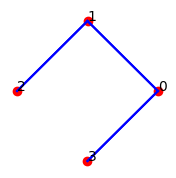

In [2]:
example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))

print("Bit string:", example_graph.to_bitstring())
print("Bit integer:", example_graph.to_bitint())
print("Adjacency matrix from bitstring:\n", Graph.bitstring_to_adjacency_matrix(example_graph.to_bitstring()))
print("Adjacency matrix:\n", example_graph.adj_matrix)
# This is actually a degree sequence - go fix
print("Edge sequence (sum of rows):", example_graph.get_edge_sequence())
print("Connectivity sequence (upper-triangle binary string value):", example_graph.get_connectivity_sequence())
example_graph.plot_graph(vertex_labels=True)

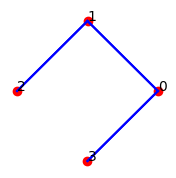

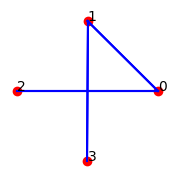

In [3]:
example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))

# swopped the adjecencies of the graph to demonstrate how edge connectivity is modified
# Not how the vertex labels are modified

example_graph.plot_graph(vertex_labels=True)
example_graph.permute(2,3)
example_graph.plot_graph(vertex_labels=True)

#### Subgraph Search

Clique searching is an NP-Complete problem (Sipser).

As an extension of that idea, any subgraph search is similar to a clique search and is thus very likely also NP-Complete.

This algorithm is an initial attempt to explore this search in a classical manner


Inspired by a 2D convolution

##### All possible subgraphs

![K3inK6](./media/videos/subgraph_search/720p30/K3inK6.gif "K3 in K6")

More GIFs:
* [K4 in K6](./media/videos/subgraph_search/720p30/K4inK6.gif)
* [K4 in K8](./media/videos/subgraph_search/720p30/K4inK8.gif)
* [K9 in K10](./media/videos/subgraph_search/720p30/K9inK10.gif)

##### Subgraph Search Algorithm

1. Construct the set of all subgraphs $H$ of order $k$ from graph $G$ of order $n$
    * A subgraph exists as a list of $k$ vertex labels from $G$ such as $\{ 2, 3, 4 \}$
    * In the above example, we are looking at the subgraph H of 3 vertices $v^G_2$, $v^G_3$ and, $v^G_4$ from $V(G)$
    * This list ordering constructs an index mapping $\alpha$ from $V(H)$ to $V(G)$ ($v^H_0 \rightarrow v^G_2$)
2. For each subgraph:
    1. Check that all edges in $H$ have the same value as the corresponding edge in $G$
        * Use $\alpha$: $\alpha(e^G_{2,4}) = e^H_{0,2} = 1 \iff e^G_{2,4} = 1$
    2. If a subgraph $H$ has all edges matching to $G$ then $H \subseteq G$
    3. Else, $H \nsubseteq G$

K3 in K4: True


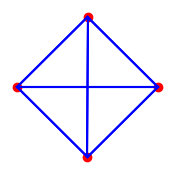

K3 in G4a: True


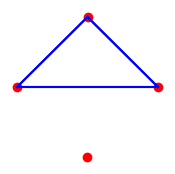

K3 in G4b: True


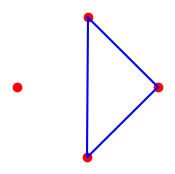

K3 in G4c: False


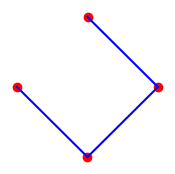

K3 in G5a: True


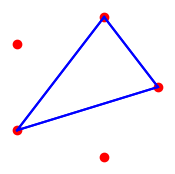

In [4]:
K3 = Graph(np.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]))

K4 = Graph(np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0]
]))

G4a = Graph(np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [0, 0, 0, 0]
]))

G4b = Graph(np.array([
    [0, 1, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]))

G4c = Graph(np.array([
    [0, 1, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
]))

G5a = Graph(np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
]))

print(f"K3 in K4: {K4.has_subgraph(K3)}")
K4.plot_graph(vertex_labels=False)

print(f"K3 in G4a: {G4a.has_subgraph(K3)}")
G4a.plot_graph(vertex_labels=False)

print(f"K3 in G4b: {G4b.has_subgraph(K3)}")
G4b.plot_graph(vertex_labels=False)

print(f"K3 in G4c: {G4c.has_subgraph(K3)}")
G4c.plot_graph(vertex_labels=False)

print(f"K3 in G5a: {G5a.has_subgraph(K3)}")
G5a.plot_graph(vertex_labels=False)

#### $\mathbb{H}$(3)

i Bitstring Bitint Edge-Sequence Edge-Count Connectivity-Sequence Connectivity-Sum
0 000 0 [0 0 0] [0. 0. 0.] 0.0
1 001 1 [0 1 1] [0. 1. 0.] 1.0
2 011 3 [1 1 2] [1. 1. 0.] 2.0
3 111 7 [2 2 2] [3. 1. 0.] 4.0


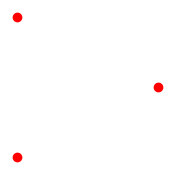

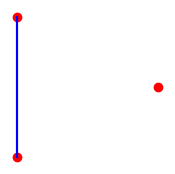

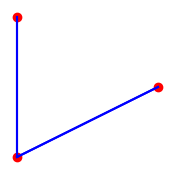

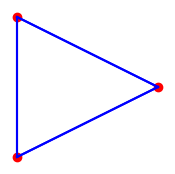

In [5]:
H3 = [
    Graph(Graph.bitstring_to_adjacency_matrix("000")),
    Graph(Graph.bitstring_to_adjacency_matrix("001")),
    Graph(Graph.bitstring_to_adjacency_matrix("011")),
    Graph(Graph.bitstring_to_adjacency_matrix("111")),
]

print("i", "Bitstring", "Bitint", "Edge-Sequence" ,"Edge-Count", "Connectivity-Sequence", "Connectivity-Sum")
for i, h in enumerate(H3):
    print(i, h.to_bitstring(), h.to_bitint(), h.get_edge_sequence(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

for h in H3:
    h.plot_graph()

#### $\mathbb{H}$(4)

i  Bitstring Bitint Edge-Sequence Edge-Count Connectivity-Sequence Connectivity-Sum
0  000000 0 [0 0 0 0] 0.0 [0. 0. 0. 0.] 0.0
1  000001 1 [0 0 1 1] 1.0 [0. 0. 1. 0.] 1.0
2  000011 3 [0 1 1 2] 2.0 [0. 1. 1. 0.] 2.0
3  100001 33 [1 1 1 1] 2.0 [4. 0. 1. 0.] 5.0
4  000111 7 [0 2 2 2] 3.0 [0. 3. 1. 0.] 4.0
5  001101 13 [1 1 2 2] 3.0 [1. 2. 1. 0.] 4.0
6  010101 21 [1 1 3 1] 3.0 [2. 2. 1. 0.] 5.0
7  011101 29 [2 1 3 2] 4.0 [3. 2. 1. 0.] 6.0
8  101101 45 [2 2 2 2] 4.0 [5. 2. 1. 0.] 8.0
9  110111 55 [2 3 3 2] 5.0 [6. 3. 1. 0.] 10.0
10 111111 63 [3 3 3 3] 6.0 [7. 3. 1. 0.] 11.0


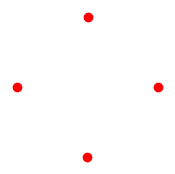

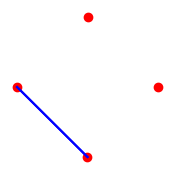

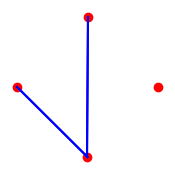

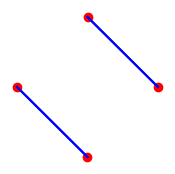

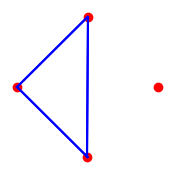

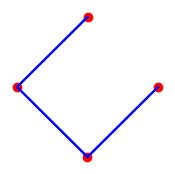

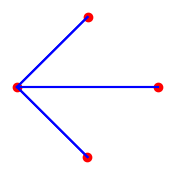

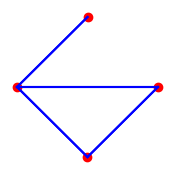

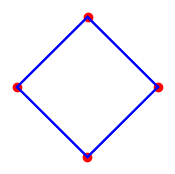

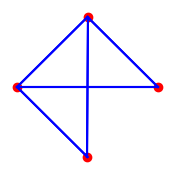

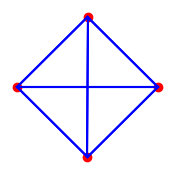

In [6]:
H4 = [
    Graph(Graph.bitstring_to_adjacency_matrix("000000")),
    Graph(Graph.bitstring_to_adjacency_matrix("000001")),
    Graph(Graph.bitstring_to_adjacency_matrix("000011")),
    Graph(Graph.bitstring_to_adjacency_matrix("100001")),
    Graph(Graph.bitstring_to_adjacency_matrix("000111")),
    Graph(Graph.bitstring_to_adjacency_matrix("001101")),
    Graph(Graph.bitstring_to_adjacency_matrix("010101")),
    Graph(Graph.bitstring_to_adjacency_matrix("011101")),
    Graph(Graph.bitstring_to_adjacency_matrix("101101")),
    Graph(Graph.bitstring_to_adjacency_matrix("110111")),
    # Graph(Graph.bitstring_to_adjacency_matrix("011111")),
    Graph(Graph.bitstring_to_adjacency_matrix("111111")),
]

print("i ", "Bitstring", "Bitint", "Edge-Sequence" ,"Edge-Count", "Connectivity-Sequence", "Connectivity-Sum")
for i, h in enumerate(H4):
    print(f"{i: <2}", h.to_bitstring(), h.to_bitint(), h.get_edge_sequence(), h.get_edge_count(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

for h in H4:
    h.plot_graph()

## Graphs of size $n$

* $\mathbb{G}(n)$ - The set of all graphs of size $n$
* $\mathbb{H}(n)$ - The set of all non-homomorphic graphs of size $n$

#### Visualizing the number of graphs

* The size of $\mathbb{G}(n)$ is $2^{n(n-1)/2}$
* The upperbound on the size of $\mathbb{H}(n)$ is $n!$

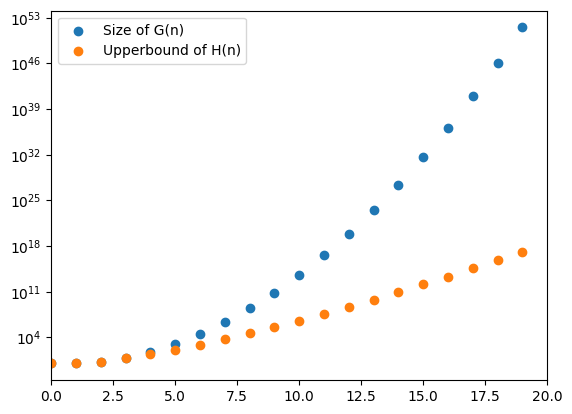

In [7]:
n = np.arange(20, dtype=np.int32)
# size_G = np.power(np.array(n * (n - 1) / 2, dtype=np.int32), [2])
size_G = 2 ** (n * (n - 1) / 2)
size_H = scpp.factorial(n)

plt.scatter(n, size_G, label='Size of G(n)')
plt.scatter(n, size_H, label='Upperbound of H(n)')

plt.legend(loc='upper left')
plt.xlim(left=0, right=20)
plt.yscale('log')

### Constructing $\mathbb{G}(n)$ and $\mathbb{H}(n)$

In [8]:
graph_size = 3
bitlength = int(graph_size * (graph_size - 1) / 2) # not reused because has different meaning
num_graphs = int( 2**(graph_size * (graph_size - 1) / 2) )
num_hgraphs = int(m.factorial(graph_size))

print(f"n = {graph_size}")
print(f"|G(n)| = {num_graphs:,}".replace(',',' '))
print(f"<=|H(n)| = {num_hgraphs:,}".replace(',', ' '))
print(f"Order of Magnitude |G(n)| = {m.ceil(m.log10(num_graphs))}")
print(f"Order of Magnitude <=|H(n)| = {m.ceil(m.log10(num_hgraphs))}")

n = 3
|G(n)| = 8
<=|H(n)| = 6
Order of Magnitude |G(n)| = 1
Order of Magnitude <=|H(n)| = 1


#### Generating $\mathbb{G}(n)$

> WARNING: Will only work for $n <= 8$ 

In [9]:
G = []
if graph_size > 7:
    raise UserWarning(f"Too large n = {graph_size} for G(n) generation\n\tThere are {num_graphs} graphs in G({graph_size})")

for i in range(num_graphs):
    if i % 10_000 == 0:
        print(f"\rGenerated {i / num_graphs * 100:.2f}% of all graphs", end='')

    graph_bitstring = bin(i)[2:].zfill(bitlength)
    G.append(Graph(Graph.bitstring_to_adjacency_matrix(graph_bitstring)))
print(f"\rGenerated 100.00% of all graphs")


Generated 100.00% of all graphs


In [10]:
for i, g in enumerate(G):
    print(i, g.to_bitint(), g.to_bitstring())
    # g.plot_graph()

0 0 000
1 1 001
2 2 010
3 3 011
4 4 100
5 5 101
6 6 110
7 7 111


#### Generating $\mathbb{H}(n)$

> WARNING: Will only work for $n <= 11$ 

In [11]:
if graph_size > 11:
    raise UserWarning(f"Too large n = {graph_size} for H(n) generation\n\tThere are {num_hgraphs} graphs in H({graph_size})")

H = []


# Ramsey Numbers algorithms

1. Exhaustive $\mathbb{G}(n)$ Search
    * Test if all graphs of order $n$ have a $k$-clique or $l$-independent set
    * $O(2^{n^2})$
2. Exhaustive $\mathbb{H}(n)$ Search
    * Test if all non-homomorphic graphs of order $n$ have a $k$-clique or $l$-independent set
    * $O(n!)$
3. Depth First $\mathbb{G}(n)$ Search
    * Construct the graphs of $\mathbb{G}(n)$ with a binary tree, while performing a test at each tree vertex to prune the search depth
    * If the leaf vertices are never reached then there is no graph $G \in \mathbb{G}$ with either a $k$-clique or $l$-independent set
    * Worst Case: $O(2^{n^2})$
        * Worse case if the colouring is the very last leaf node, which is an empty graph, thus technically making the worst case impossible if $n$ > $l$
        * <div class="alert alert-block alert-info"><b>TODO:</b> Perform average case analysis</div>

#### Checklist
- [ ] Exhaustive $\mathbb{G}(n)$
- [ ] Exhaustive $\mathbb{H}(n)$
- [ ] DFS $\mathbb{G}(n)$

### Exhaustive $\mathbb{G}(n)$ Search for $R(k,l)$